In [1]:
#importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#carregando df
df = pd.read_csv('streaming_data.csv')

In [4]:
#primeiras linhas do df
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [5]:
#describe
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [7]:
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

In [8]:
#agrupando por Churned
churn_agg = df.groupby('Churned')['User_id'].count().reset_index()
churn_agg

,Churned,User_id
0,0.0,46285
1,1.0,14863


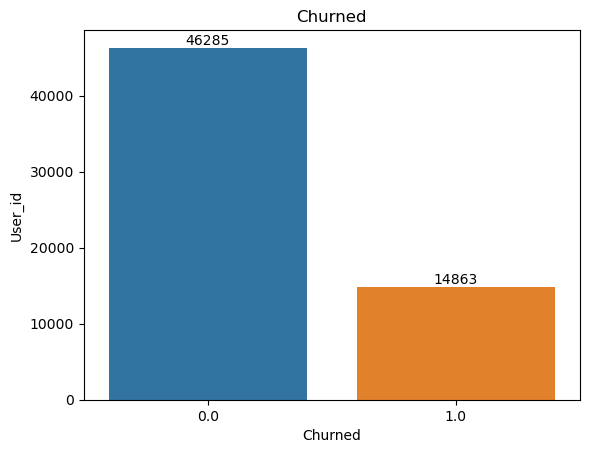

In [9]:
# Criando o barplot
ax = sns.barplot(data=churn_agg, x='Churned', y='User_id')

# Adicionando os valores totais acima de cada barra
ax.bar_label(ax.containers[0])
plt.title('Churned')

# Exibindo o gráfico
plt.show()

In [10]:
df.head(2)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31


In [11]:
#preenchendo valores faltantes com 0 nas colunas especificadas do projeto
df[['Time_on_platform','Num_streaming_services','Churned','Avg_rating','Devices_connected']] = df[['Time_on_platform','Num_streaming_services','Churned','Avg_rating','Devices_connected']].fillna(0)

In [12]:
#removendo valores nulos nas colunas restantes
df = df.dropna()

In [13]:
#confirmando que os nulos foram tratados corretamente
df.isna().sum()

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64

In [14]:
df.Churned.isna().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  float64
 9   User_id                 36515 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [16]:
cols_float = ['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services']
df[cols_float] = df[cols_float].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  int32  
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  int32  
 3   Devices_connected       36515 non-null  int32  
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  int32  
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  float64
 9   User_id                 36515 non-null  object 
dtypes: float64(2), int32(4), int64(1), object(3)
memory usage: 2.5+ MB


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
#from sklearn.utils import shuffle
# Definindo majoritario e minoritario
#df_majority = df[df['Churned'] == 0]
#df_minority = df[df['Churned'] == 1]

# Reduzir o número de exemplos da classe majoritária
#df_majority_downsampled = df_majority.sample(len(df_minority))

# Combinar as duas classes
#df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Embaralhar o DataFrame balanceado
#df_balanced = shuffle(df_balanced, random_state=42)

In [20]:
#X = df_balanced.drop(['Churned','User_id'],axis=1)
#y = df_balanced[['Churned']]

In [21]:
X = df.drop(['Churned','User_id'],axis=1)
y = df[['Churned']]

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churned) 
y.Churn = le.transform(y.Churned)

In [23]:
X = pd.get_dummies(X)
X

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,49,4700,3,0,3,0.00,False,True,True,False,False
1,69,6107,2,0,1,2.14,True,False,False,False,True
2,44,6374,3,1,1,1.91,False,True,False,True,False
3,26,0,5,0,2,0.00,False,True,True,False,False
5,54,3024,2,0,1,0.00,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
77879,45,0,0,0,5,2.20,False,True,True,False,False
77880,47,6176,0,0,2,4.54,True,False,False,True,False
77881,64,0,5,0,1,4.34,True,False,False,True,False
77882,58,1314,5,0,4,0.00,False,True,False,False,True


In [24]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()
# Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(mm.fit_transform(X), columns=X.columns, index=X.index)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=7)

# Regressão Logística

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200,class_weight='balanced')
lr = model.fit(X_train, y_train)

In [27]:
lr.predict(X_test)

array([0., 0., 0., ..., 0., 0., 1.])

In [28]:
X_test_ = X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

In [29]:
X_test_

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churn,label
21452,0.568627,0.763329,0.8,0.00,0.50,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0
50417,0.705882,0.110172,0.2,0.00,0.75,0.368,1.0,0.0,0.0,0.0,1.0,0.0,0.0
68121,0.666667,0.880922,0.6,0.25,1.00,0.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
76017,0.607843,0.958100,1.0,0.00,1.00,0.870,1.0,0.0,0.0,0.0,1.0,1.0,0.0
31352,0.098039,0.000000,0.8,0.00,0.00,0.424,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28955,0.254902,0.000000,0.8,0.00,0.75,0.968,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7492,0.960784,0.497431,1.0,0.00,0.75,0.000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
28843,0.901961,0.663318,0.0,0.00,0.25,0.390,1.0,0.0,0.0,1.0,0.0,1.0,0.0
60365,0.803922,0.143966,0.2,0.00,0.00,0.370,0.0,1.0,0.0,0.0,1.0,0.0,0.0


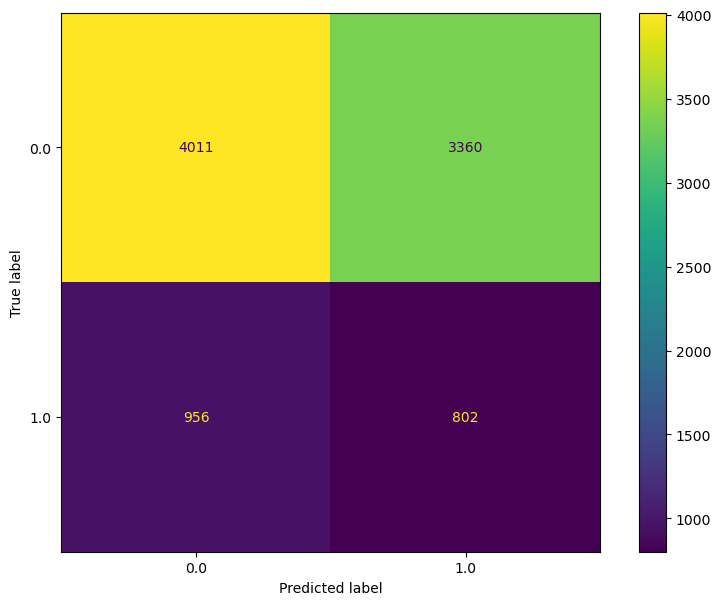

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

# Suponha que `y_test` e `y_pred` sejam suas verdadeiras labels e previsões
disp = ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, values_format='d')
disp.figure_.set_size_inches(10, 7)  # Ajuste o tamanho da figura se necess

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, lr.predict(X_train))

0.5306360914335791

In [32]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.5306360914335791
Acurácia (Teste): 0.5272209442436192
Acurácia Balanceada (Treino): 0.5100966377121665
Acurácia Balanceada (Teste): 0.5001798858454148
Precision (Treino): 0.20030144375694114
Precision (Teste): 0.19269581931763574
Recall (Treino): 0.4765949414873537
Recall (Teste): 0.45620022753128553
F1-Score (Treino): 0.2820598748882931
F1-Score (Teste): 0.2709459459459459
ROCAUC (Treino): 0.5140437725743445
ROCAUC (Teste): 0.502251312641908


In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],           # Tipo de regularização
    'C': [0.01, 0.1, 1, 10, 100],      # Parâmetro de regularização
    'solver': ['liblinear', 'saga']    # Algoritmos de otimização
}

# 4. Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# 5. Treinar o modelo com GridSearchCV
grid_search.fit(X_train, y_train)

# 6. Avaliar os melhores parâmetros e o desempenho do modelo
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

print("\nMelhor acurácia encontrada:")
print(grid_search.best_score_)

Melhores parâmetros encontrados:
{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

Melhor acurácia encontrada:
0.8065434910088676


In [34]:
# Melhores parâmetros encontrados
best_params = {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [35]:
model = LogisticRegression(C=best_params['C'], 
                           penalty=best_params['penalty'], 
                           solver=best_params['solver'],
                           max_iter=200,
                           class_weight='balanced')

In [36]:
lr_tunned = model.fit(X_train,y_train)

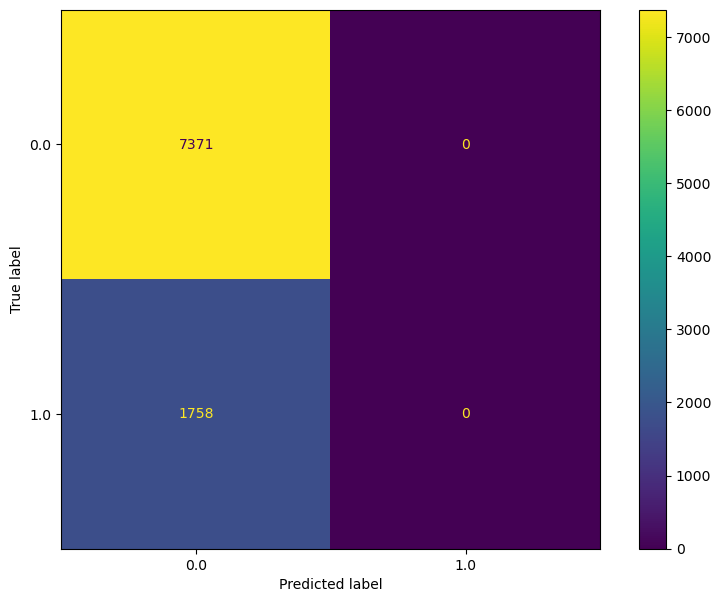

In [37]:
# Suponha que `y_test` e `y_pred` sejam suas verdadeiras labels e previsões
disp = ConfusionMatrixDisplay.from_estimator(lr_tunned, X_test, y_test, values_format='d')
disp.figure_.set_size_inches(10, 7)  # Ajuste o tamanho da figura se necess

In [38]:
print(f"Acurácia (Treino): {accuracy_score(y_train, lr_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr_tunned.predict(X_test))}")

Acurácia (Treino): 0.8065434893741328
Acurácia (Teste): 0.807426881367072


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()

In [40]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
rf.predict(X_test)

array([0., 0., 0., ..., 0., 1., 0.])

In [42]:
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churn,label
21452,0.568627,0.763329,0.8,0.00,0.50,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0
50417,0.705882,0.110172,0.2,0.00,0.75,0.368,1.0,0.0,0.0,0.0,1.0,0.0,0.0
68121,0.666667,0.880922,0.6,0.25,1.00,0.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
76017,0.607843,0.958100,1.0,0.00,1.00,0.870,1.0,0.0,0.0,0.0,1.0,1.0,0.0
31352,0.098039,0.000000,0.8,0.00,0.00,0.424,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28955,0.254902,0.000000,0.8,0.00,0.75,0.968,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7492,0.960784,0.497431,1.0,0.00,0.75,0.000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
28843,0.901961,0.663318,0.0,0.00,0.25,0.390,1.0,0.0,0.0,1.0,0.0,1.0,0.0
60365,0.803922,0.143966,0.2,0.00,0.00,0.370,0.0,1.0,0.0,0.0,1.0,0.0,1.0


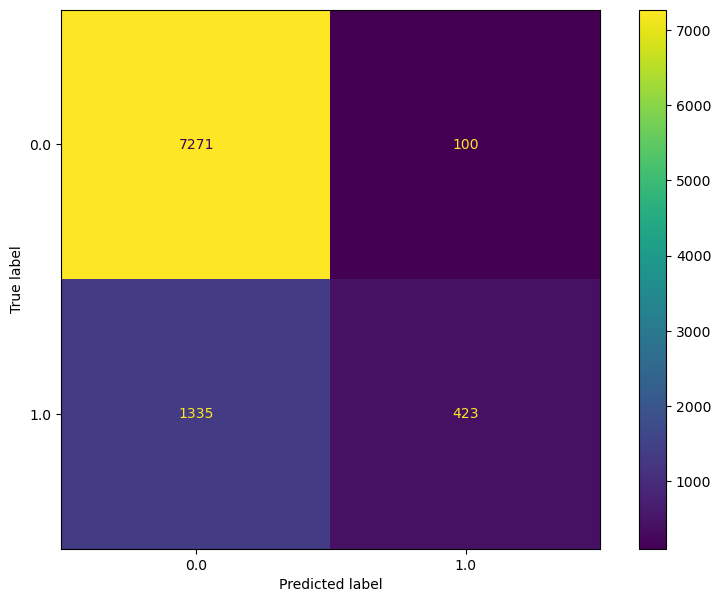

In [43]:
# Suponha que `y_test` e `y_pred` sejam suas verdadeiras labels e previsões
disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, values_format='d')
disp.figure_.set_size_inches(10, 7)  # Ajuste o tamanho da figura se necess

In [44]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9984663696779377
Acurácia (Teste): 0.8428086318326213
Acurácia Balanceada (Treino): 0.997184056252426
Acurácia Balanceada (Teste): 0.6135238271188214
Precision (Treino): 0.9969742813918305
Precision (Teste): 0.8087954110898662
Recall (Treino): 0.9950924877312193
Recall (Teste): 0.24061433447098976
F1-Score (Treino): 0.9960324957491026
F1-Score (Teste): 0.3708899605436212
ROCAUC (Treino): 0.9999362556978921
ROCAUC (Teste): 0.6860414371790937


In [45]:
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100,200,300,400,500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [46]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [47]:
dict = grid_search.best_estimator_.get_params()

In [48]:
dict

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
rf_tunned = RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= 10,
 max_features= 'sqrt',
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 100,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False)

In [50]:
rf_tunned

RandomForestClassifier(max_depth=10)

In [51]:
rf_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [52]:
rf_tunned.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churn,label
21452,0.568627,0.763329,0.8,0.00,0.50,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0
50417,0.705882,0.110172,0.2,0.00,0.75,0.368,1.0,0.0,0.0,0.0,1.0,0.0,0.0
68121,0.666667,0.880922,0.6,0.25,1.00,0.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
76017,0.607843,0.958100,1.0,0.00,1.00,0.870,1.0,0.0,0.0,0.0,1.0,1.0,0.0
31352,0.098039,0.000000,0.8,0.00,0.00,0.424,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28955,0.254902,0.000000,0.8,0.00,0.75,0.968,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7492,0.960784,0.497431,1.0,0.00,0.75,0.000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
28843,0.901961,0.663318,0.0,0.00,0.25,0.390,1.0,0.0,0.0,1.0,0.0,1.0,0.0
60365,0.803922,0.143966,0.2,0.00,0.00,0.370,0.0,1.0,0.0,0.0,1.0,0.0,0.0


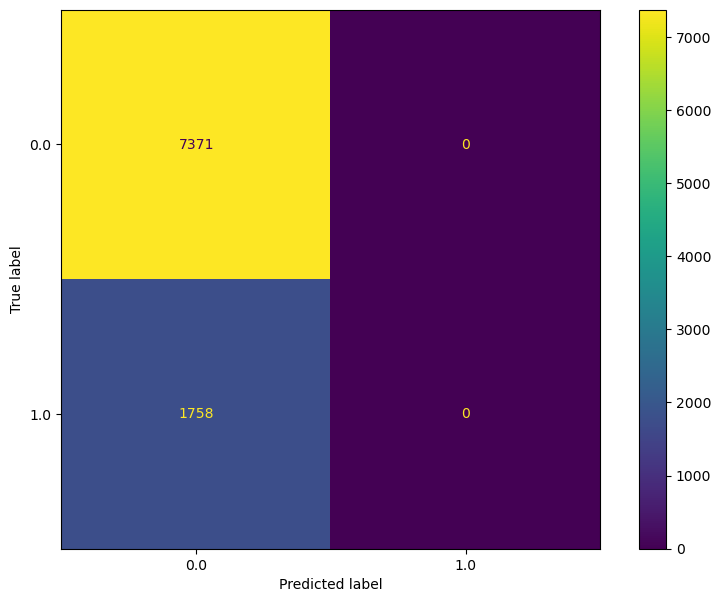

In [56]:
# Suponha que `y_test` e `y_pred` sejam suas verdadeiras labels e previsões
disp = ConfusionMatrixDisplay.from_estimator(rf_tunned, X_test, y_test, values_format='d')
disp.figure_.set_size_inches(10, 7)  # Ajuste o tamanho da figura se necess

In [54]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8074928795735047
Acurácia (Teste): 0.807426881367072
Acurácia Balanceada (Treino): 0.5024537561343904
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 1.0
Precision (Teste): 0.0
Recall (Treino): 0.004907512268780672
Recall (Teste): 0.0
F1-Score (Treino): 0.009767092411720512
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.8905994557068067
ROCAUC (Teste): 0.6011339290633944
